<a href="https://colab.research.google.com/github/Phonghuynh66/Artificial-Intelligence-Class/blob/master/CNN_14_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(train_X, train_Y),(test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X.reshape(60000, 28, 28, 1)
test_X = test_X.reshape(10000, 28, 28, 1)

train_X = train_X.astype('float32') /255
test_X = test_X.astype('float32') /255

from keras.utils import to_categorical

train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras import losses
batch_size = 64
epochs = 20
classes = 10
loss = losses

model = Sequential()
#VGG_1
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape = (28, 28, 1), padding = 'same'))    #  32 la so lan tich chap, kernel_size la kich thuoc filter
model.add(LeakyReLU(alpha = 0.1))                                                                                                                       
model.add(MaxPooling2D((2, 2), padding = 'same'))                    
#VGG_2
model.add(Conv2D(64, (3, 3), activation = 'linear', padding = 'same'))      #input_shape da duoc tinh o VGG_1 va chuyen vao 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#VGG_3
model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

# Bo ANN phan loai
model.add(Flatten())  # Chuyen anh sang dang vector
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes, activation='softmax')) #classes = 10

from keras import optimizers
model.compile(loss = loss.categorical_crossentropy, optimizer = "adam", metrics = ['accuracy']) 
model.summary()







4422102/4422102 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0   

Test loss:  0.4951933026313782
Test accuracy:  0.9186999797821045


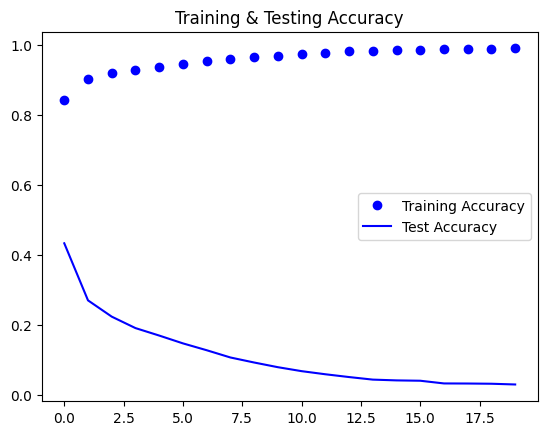

In [10]:
model.save('path/to/saved/model.h5') 
from keras.models import load_model
model = load_model('path/to/saved/model.h5')
eval = model.evaluate(test_X, test_Y, verbose = 0)  #verbose = 0: khong hien thi train
print('Test loss: ', eval[0])
print('Test accuracy: ', eval[1])
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')   # 'bo' la dau tron
plt.plot(epochs, loss, 'b', label = 'Test Accuracy')
plt.title('Training & Testing Accuracy')
plt.legend()
plt.show()
